# What is Statistics?
Statistics is the science of collecting, organizing and analzsing data.

# What is data?
Data are facts or peice of information.

# How mean and median used in data science?
Mean and Median used for descriptive analysis and filling NA values in data set 

# What is Mean?
Mean means average.

# What is Mode?
Mode means most occurring value in a dataset.

# What is the use of percentile in data science?
Percentile is used for general data analyis and outliers removal.

# What is outlier?
Outlier is a data point that is very different than rest of the data points. 

# What is IQR?
The range between 25 and 75 percentile is known as interquartile range or IQR.

# Population / (N)
The group that we are interested in studying

# Sample / (n)
It is a subset of the population. Eg:- Media conduct exit pole through sample of population to predict the resullt or conclusion.

# Sampling Techniques
The goal of sampling is to create a sample that is representative of the entire population.

## 1) Simple Random Sampling :-
 When performing Simple Random Sampling, every member of population(N) has an equal chance of being selected for your sample(n). 
## 2) Statified Sampling :- 
Perform sampling of particular catogory of people which can not be overlaped. Eg :- sampling of particular catogory like male and female. 
## 3) Systematic Sampling :- 
It is usually perform when conducted a survey. Like you decide to take samples from every 4th person you see outside the mall.
## 4) Convenience Sampling / Voluntary Response Sampling :- 
It is perfrom when you conduct a survey in particular domain / things. Like If you conduct a survey of Data Science then you have to collect samples of only that people who have knowledge or expertise in Data Science.



# Variable
Variable is a property that can take on  many values.

# Types of Variable
## 1) Quantitative Variable
## (i) Discrete Variable :- 
Consists of only Whole Numbers like integers not float.
## (ii) Continuous Variable :-
 Consists of infinite numbers like float, integers both.
## 2) Qualitative / Categorical Variable :-
 Consists of classification of property. Eg:- Gender is property and male/female is their classification so variable contains only male or female

# Percentile
A Percantile is a value below which a certain percentage of observations lie. Eg:- 95 percentile means that the person has got better marks than 95% of entire students.

# Types of Statistics

# 1) Descriptive Statistics :-
 It consists of organizing and summarizing of data.


## (i) Measure Of Central Tendency (Mean, Median, Mode) :- 
Central Tendency refers to the measure used to determine the "centre" of the distribution of data.

 

## (ii) Measure Of Dispersion (Variance and Standard Deviation)
## (iii) Different types of distribution of data
## (iv) Histograms, Probability Density Function (PDF), Probability Mass Function (PMF)

# 2) Inferential Statistics :- 
It consists of using data you have measured to form conclusion.

# HYPOTHESIS TESTING
Hypothesis testing is a form of statistical inference that use data from a sample to draw conclusion about a population parameter or a population probability distribution.

# What is Hypothesis Testing?
Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis.

# Types of Hypothesis Tests

## If P value is <= 0.05 we reject null hypothesis and accept alternate hypothesis
## If P value is > 0.05 we accept null hypothesis

##  One Sample Propotion Test  :- One Catogorical feature

## Chi-Square Test :- Two Catogorical Feature

## T-Test :- One Numerical Feature or One Numerical Feature and One Catogorical Feature that having not more than 2 catogories 

##  There are 3 types of T-Test :- One Sample or 1 Tail Test, Two Sample or 2 Tail Test and Paired T-Test

##  Correlation Test :- Two Numerical Feature 

## Anova Test/F-Test :- One Numerical and One or Multiple Catogorical Features having multiple catogories

# Chi-Square Test
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [1]:
import scipy.stats as stats

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [3]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [5]:
dataset_table.values 

array([[60, 97],
       [33, 54]], dtype=int64)

In [6]:
#Observed Values

Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [7]:
val=stats.chi2_contingency(dataset_table)

In [8]:
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [9]:
Expected_Values=val[3]

In [10]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [11]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]


In [12]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [13]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [14]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [15]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features
T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# One-sample T-test with Python
The test will tell us whether means of the sample and the population are different

In [16]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [17]:
len(ages)

32

In [18]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [19]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [20]:
age_sample

array([70, 23, 18, 70, 26, 23, 43, 27, 24, 18])

In [21]:
from scipy.stats import ttest_1samp

In [22]:
ttest,p_value=ttest_1samp(age_sample,30)

In [23]:
print(p_value)

0.5255030263059943


In [24]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Some More Examples
Consider the age of students in a college and in Class A

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [26]:
classA_ages.mean()

46.9

In [27]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [28]:
p_value

1.139027071016194e-13

In [29]:
school_ages.mean()

53.303333333333335

In [30]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

In [31]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [32]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [33]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [34]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [35]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [36]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [37]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [38]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [39]:
print(p_value)

0.5732936534411279


In [40]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Correlation

In [41]:
import seaborn as sns
df=sns.load_dataset('iris')

In [42]:
df.shape

(150, 5)

In [43]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


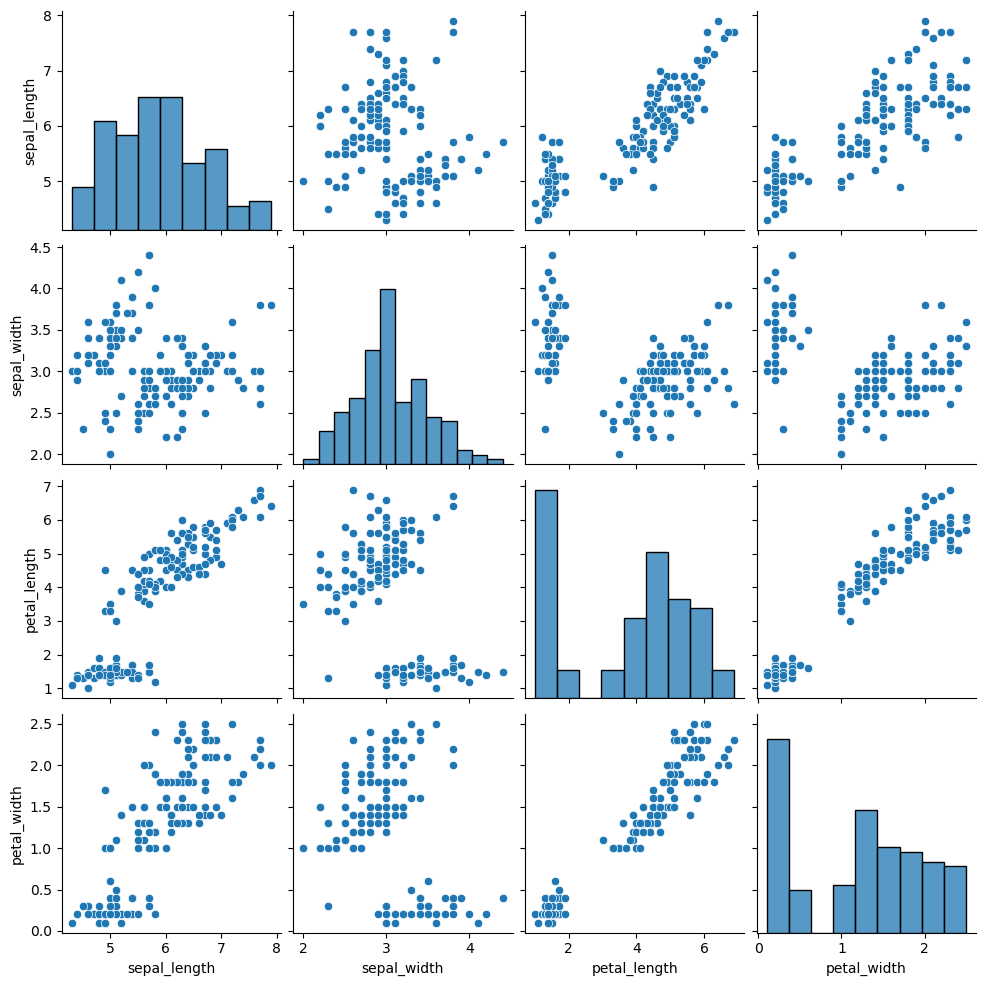

In [44]:
sns.pairplot(df)

# Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

# One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [45]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [46]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df_anova = df1[['petal_width','species']]


In [48]:
grps = pd.unique(df_anova.species.values)


In [49]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}


In [51]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [52]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])


In [53]:
print(p)


4.169445839443116e-85


In [54]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


reject null hypothesis


# Statistics Practical Implementation
## Measure Of Central Tendency
## Mean
## Median
## Mode

In [55]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [56]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [57]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [58]:
import statistics
statistics.mode(ages)

32

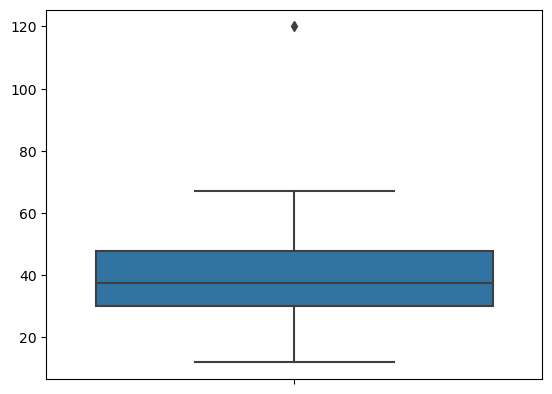

In [59]:
import seaborn as sns
sns.boxplot(y=ages)
plt.show()

# 5 Number Summary
## Indented block

In [60]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [61]:
print(q1,q3)

30.0 47.75


In [62]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


# Measure Of Dispersion

## 1. Variance
## 2. Standard Deviation

In [63]:
statistics.variance(ages)

795.2954545454545

In [64]:
np.var(ages,axis=0)

729.0208333333334

In [65]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [66]:
variance(ages)

795.2954545454545

In [67]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance

In [68]:
variance(ages,dof=1)

795.2954545454545

In [69]:
statistics.pvariance(ages)

729.0208333333334

In [70]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

# Histograms And PDF

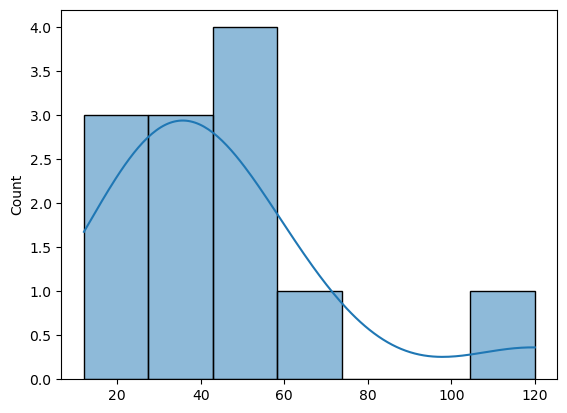

In [71]:
import seaborn as sns
sns.histplot(ages,kde=True)
plt.show()

In [72]:
df=sns.load_dataset('iris')

In [73]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


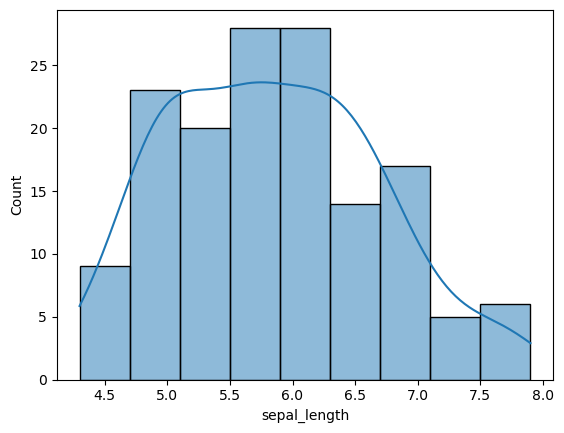

In [74]:
sns.histplot(df['sepal_length'],kde=True)
plt.show()

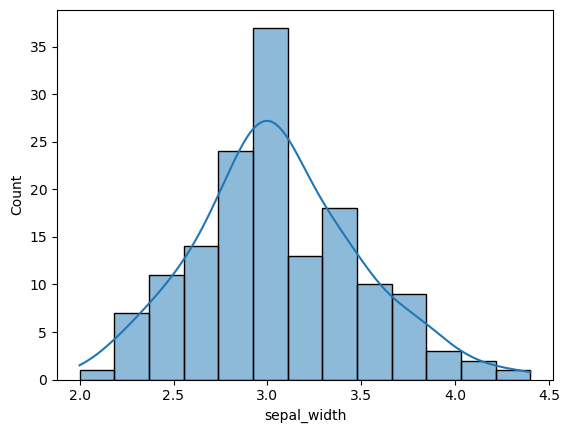

In [75]:
sns.histplot(df['sepal_width'],kde=True)
plt.show()

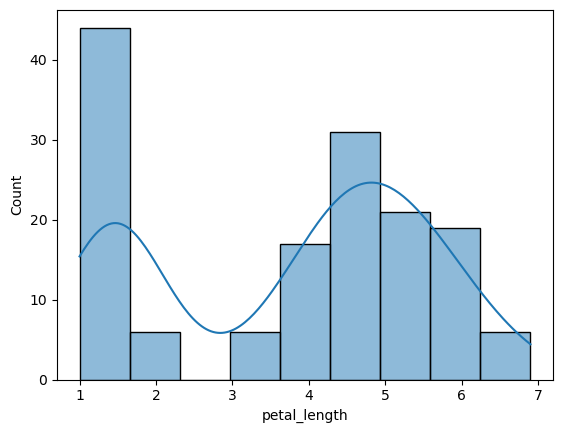

In [76]:
sns.histplot(df['petal_length'],kde=True)
plt.show()

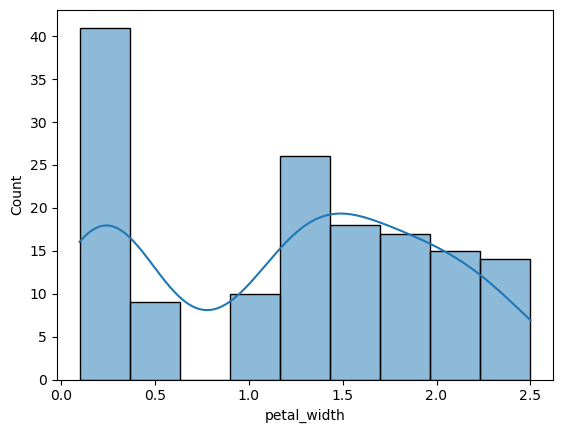

In [77]:
sns.histplot(df['petal_width'],kde=True)
plt.show()

In [78]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [79]:
s

array([ 0.19738255,  0.3472939 ,  0.54984064,  0.18203828,  0.30409482,
        0.52455233,  0.83785842,  0.53554997,  0.5064012 ,  0.88664311,
        0.28758106,  0.35347418,  0.66854828,  0.715348  ,  0.59153811,
       -0.02389866,  0.64780927,  0.63350021,  0.50928053,  0.63321552,
        0.7815897 ,  0.51022984,  0.31280503,  0.13217814,  0.51275575,
        0.35720638,  0.38762307,  0.27350623,  0.5548582 ,  0.64718242,
        0.58686375,  0.27599178,  0.67781892,  0.56290139,  0.00239911,
        0.61918172,  0.09282759,  0.27234367,  0.71152846,  0.63055371,
        0.37110663,  0.32330758,  0.56913847,  0.14063451,  0.58214192,
        0.44163531,  0.64682953,  0.47490087,  0.28229652,  0.54044618,
        0.43003312,  0.21574462,  0.26728233,  0.29866474,  0.51000435,
        0.65308603,  0.49429702,  0.25887088,  0.42369103,  0.61336873,
        0.71546735,  0.31192826,  0.55672142,  0.4219359 ,  0.06917511,
        0.24106325,  0.38675586,  0.39645816,  0.42082434,  0.37

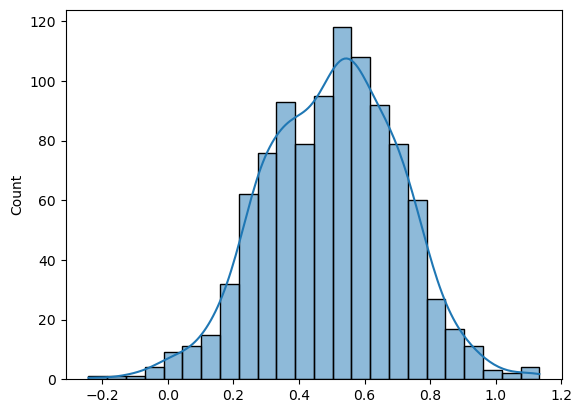

In [80]:
sns.histplot(s,kde=True)
plt.show()

# Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [81]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

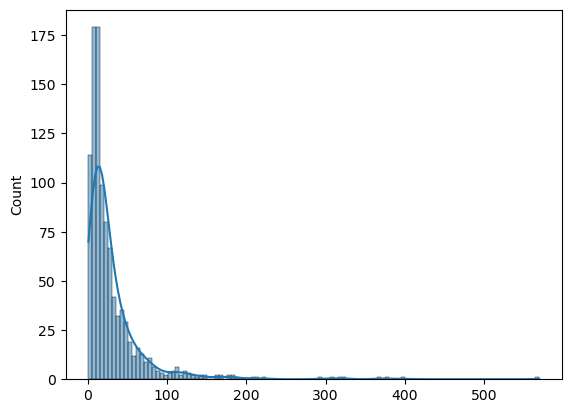

In [82]:
sns.histplot(s,kde=True)
plt.show()

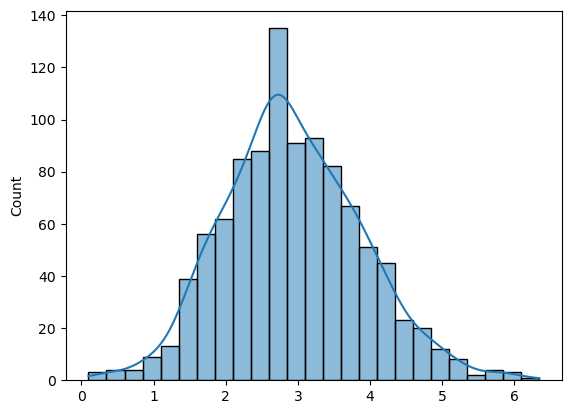

In [83]:
sns.histplot(np.log(s),kde=True)
plt.show()

# Check whether Disstribution is Normal Distribution

In [84]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


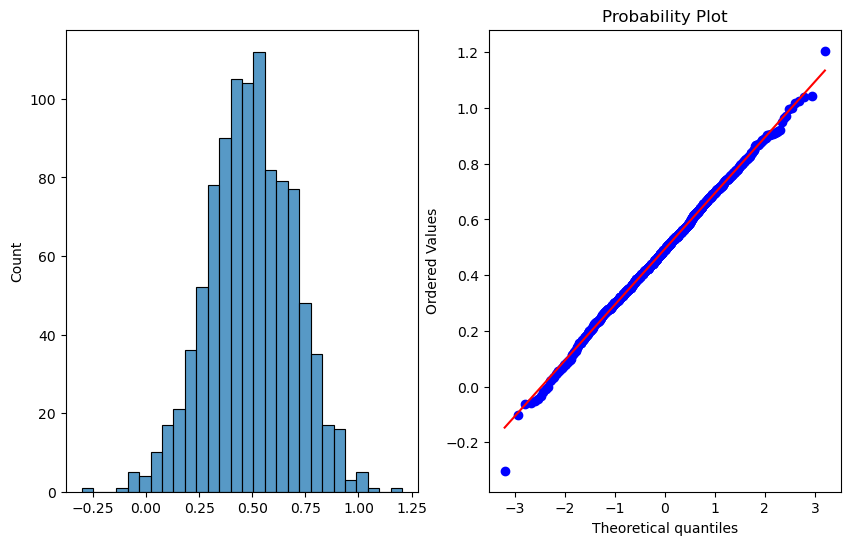

In [85]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

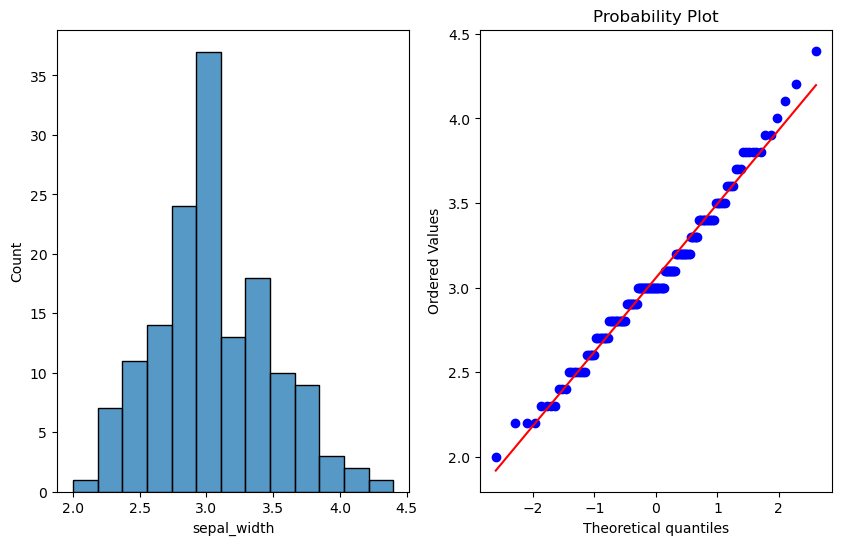

In [86]:
plot_data(df['sepal_width'])

In [87]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [88]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

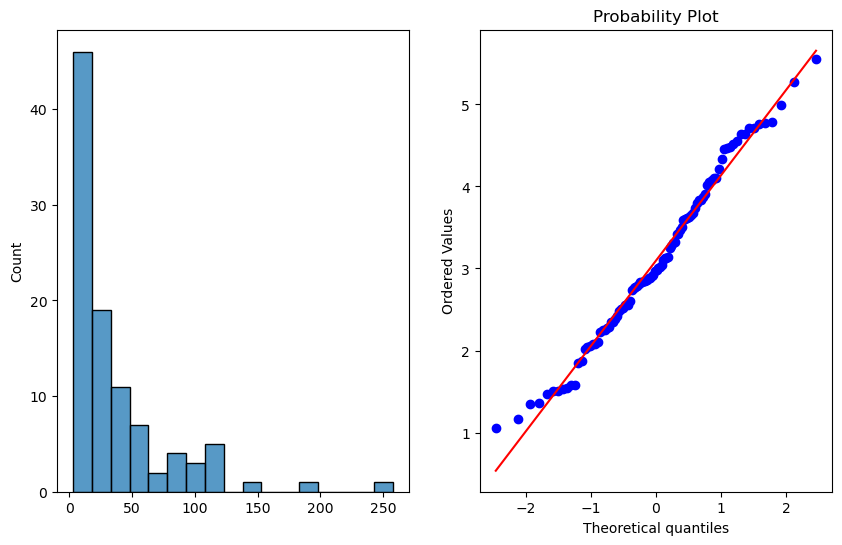

In [89]:
plot_data_log(sample)

# Pearson and Sperman Rank Correlation 

In [90]:
df=sns.load_dataset('tips')

In [91]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
import pandas as pd

In [93]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


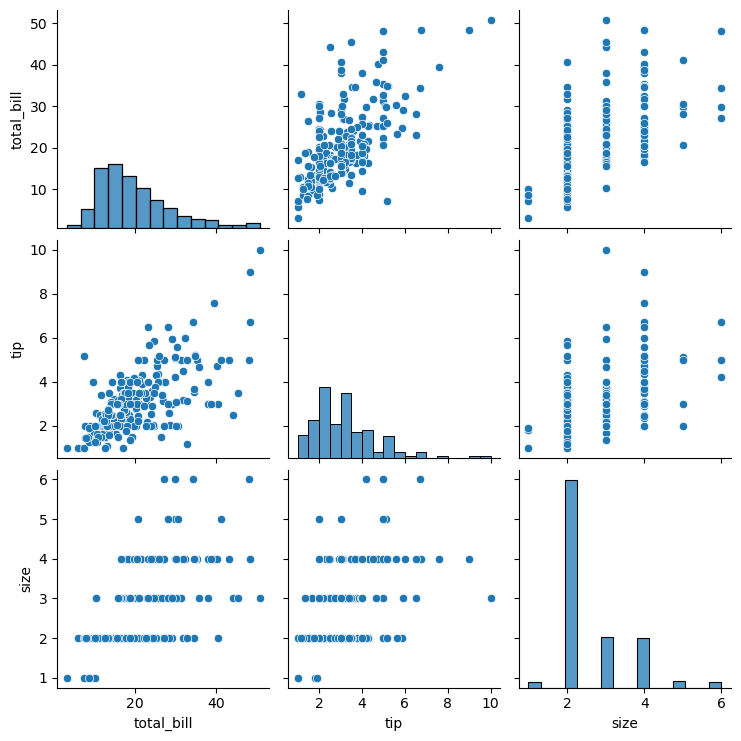

In [94]:
sns.pairplot(df)
plt.show()

# Normal Distribution and Z Score

In [95]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple

https://www.kaggle.com/mustafaali96/weight-height

In [96]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# (1) Outlier detection and removal using Standard Deviation

In [97]:
df.Height.describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [98]:
sn.histplot(df.Height, kde=True)


<AxesSubplot:xlabel='Height', ylabel='Count'>

In [99]:
mean = df.Height.mean()
mean

66.36755975482106

In [100]:
std_deviation = df.Height.std()
std_deviation

3.8475281207732324

In [101]:
mean-3*std_deviation

54.82497539250136

In [102]:
mean+3*std_deviation

77.91014411714076

In [103]:
df[(df.Height < 54.82) | (df.Height > 77.91)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [104]:
df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

(9993, 3)

# (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score


Let's add a new column in our dataframe for this Z score

In [105]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [106]:
df.Height.mean()

66.36755975482106

In [107]:
df.Height.std()

3.8475281207732324

In [108]:
(73.84-66.37)/3.84

1.9453124999999998

In [109]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [110]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


# Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [111]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# (1) Outlier detection and removal using Standard Deviation

In [112]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [113]:
sn.histplot(df.price, kde=True)


<AxesSubplot:xlabel='Height', ylabel='Count'>

In [114]:
mean = df.price.mean()
mean

112.56562650150138

In [115]:
std_deviation = df.price.std()
std_deviation

148.9716737696744

In [116]:
mean-3*std_deviation

-334.3493948075218

In [117]:
mean+3*std_deviation

559.4806478105246

In [118]:
df[(df.price < -334.34) | (df.price > 559.48)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0


# (2) Outlier detection and removal using Z Score

In [119]:
df['zscore'] = ( df.price - df.price.mean() ) / df.price.std()
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413271


Above for first record with price 39.07, z score is -0.493353. This means 39.07 is -0.493353 standard deviation away from mean

In [120]:
df.price.mean()

112.56562650150138

In [121]:
df.price.std()

148.9716737696744

In [122]:
(39.07-112.56)/148.97

-0.4933208028462107

In [123]:
df[df['zscore']>3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0,3.271994
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0,3.607628
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0,4.346023
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0,14.012291
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0,3.943262
...,...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0,5.876516
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0,3.674755
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0,3.943262
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0,16.697365


In [124]:
df[df['zscore']<-3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


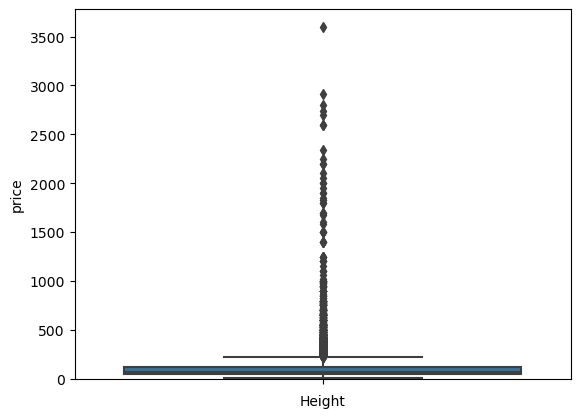

In [125]:
import seaborn as sns
sns.boxplot(y="price",data=df)
plt.show()

# How to detect outliers and how to fill NaN values 

In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("Book1.csv")
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [8]:
df.income.describe()

count    7.000000e+00
mean     1.433929e+06
std      3.777283e+06
min      4.000000e+03
25%      5.500000e+03
50%      7.000000e+03
75%      7.750000e+03
max      1.000000e+07
Name: income, dtype: float64

In [9]:
df.income.quantile(0)

4000.0

In [10]:
df.income.quantile(0.25,interpolation="higher")

6000

In [11]:
df.income.quantile(0.5,interpolation="higher")

7000

In [12]:
df.income.quantile(0.75)

7750.0

In [13]:
df.income.quantile(1)

10000000.0

In [14]:
percentile_99 = df.income.quantile(0.99)
percentile_99

9400479.999999994

In [15]:
df[df.income>percentile_99]

,name,income
6,Elon Musk,10000000


In [16]:
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [17]:
df['income'][3]=np.NaN

C:\Users\HP\AppData\Local\Temp\ipykernel_12776\3054271026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][3]=np.NaN


In [18]:
df

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [19]:
df.income.mean()

1671666.6666666667

In [20]:
df_new = df.fillna(df.income.mean())
df_new

,name,income
0,Rob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,1.671667e+06
4,Mohan,8.000000e+03
5,Tao,7.000000e+03
6,Elon Musk,1.000000e+07


In [21]:
df_new = df.fillna(df.income.median())
df_new

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0
